In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
data = pd.read_csv("Data/Belgium/NSIDE.CompleteDataBE/ods001.csv")

NameError: name 'pd' is not defined

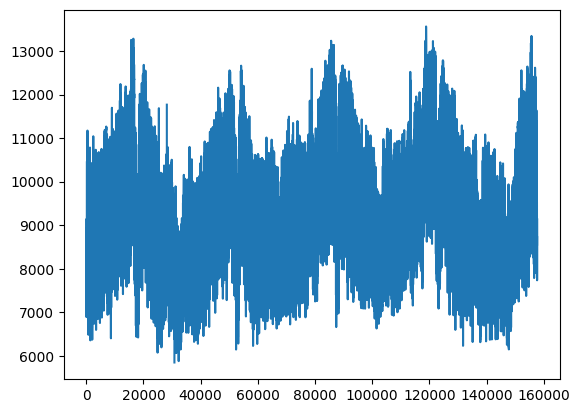

In [3]:
plt.plot(data["Total Load"])

In [4]:
import sktime

In [55]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.split import temporal_train_test_split
from sktime.utils.plotting import plot_series

In [21]:
data["Total Load"][:1000]

0       7996.52
1       8161.47
2       8221.56
3       8372.14
4       8558.23
         ...   
995    10063.22
996    10111.66
997    10055.25
998     9951.23
999     9909.04
Name: Total Load, Length: 1000, dtype: float64

In [52]:
y_train, y_test = temporal_train_test_split(data["Total Load"][:7000])
fh = ForecastingHorizon(y_test.index, is_relative=False)

0.10067564505295981

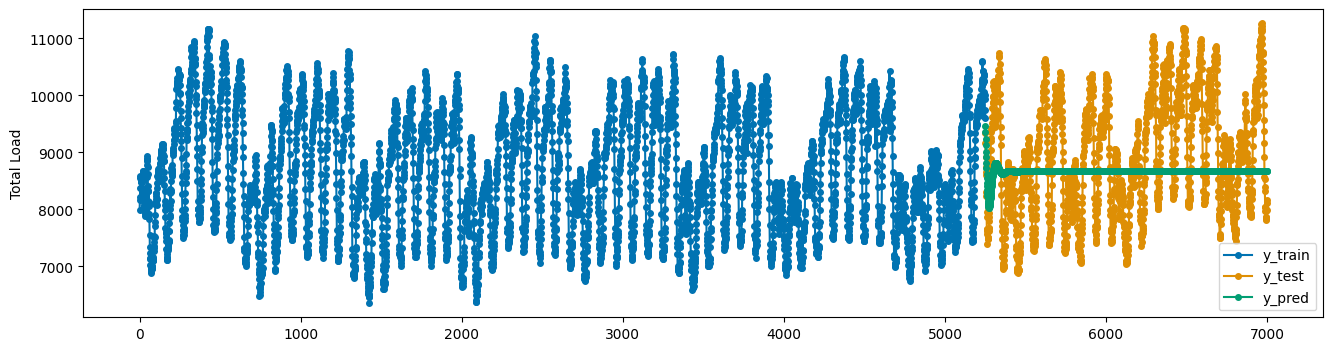

In [56]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred)

0.0881600268660146

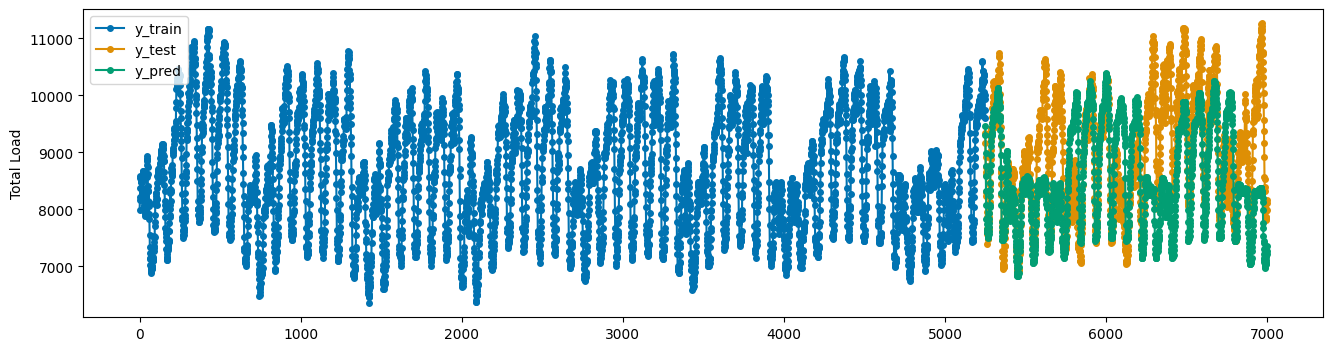

In [63]:
from xgboost import XGBRegressor
from sktime.forecasting.compose import make_reduction ### From Gianluca
regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
forecaster = make_reduction(regressor, strategy="recursive", window_length=1000)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred)